### Programming Assignment 2 Q1
### Unsupervised Learning

Group Number : 46

Student 1 : Aryan Singh 19CS30007

Student 2 : Seemant Guruprasad Achari 19CS30057


In [1]:
# importing various tools and libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.decomposition import PCA
# implement standard StandardScaler
from sklearn.preprocessing import StandardScaler


In [2]:
# loading the dataset

df = pd.read_csv('lung-cancer.data', header = None, na_values=["?"])
df.columns += 1

In [3]:
print(df)

print("Dataset loaded successfully!")

    1   2   3   4    5   6   7   8   9   10  ...  48  49  50  51  52  53  54  \
0    1   0   3   0  NaN   0   2   2   2   1  ...   2   2   2   2   2   1   1   
1    1   0   3   3  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
2    1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
3    1   0   2   3  2.0   1   3   3   3   1  ...   2   2   2   2   2   2   2   
4    1   0   3   2  1.0   1   3   3   3   2  ...   2   2   2   2   2   2   2   
5    1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
6    1   0   3   2  1.0   0   3   3   3   1  ...   2   2   2   2   1   2   2   
7    1   0   2   2  1.0   0   3   1   3   3  ...   2   2   1   2   2   2   2   
8    1   0   3   1  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
9    2   0   2   3  2.0   0   2   2   2   1  ...   2   2   2   1   3   2   1   
10   2   0   2   2  0.0   0   3   2   3   1  ...   2   2   2   2   2   2   2   
11   2   0   2   3  2.0   0   1   2   1 

In [4]:
true_labels = df.iloc[:, :1]
X_train = df.iloc[:, 1:]

print("Label attribute separated")

Label attribute separated


In [5]:
for attr,value in X_train.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")

Attribute 5 has 4 missing data.
Attribute 39 has 1 missing data.


In [6]:
# Filling the na values with mode of the columns
fill_mode = lambda col: col.replace(np.nan, col.mode()[0])
x_without_na = X_train.apply(fill_mode, axis=0)

In [7]:
for attr,value in x_without_na.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")
print("Missing data handled with mode!")

Missing data handled with mode!


In [8]:
# Data Preprocessing
scaler = StandardScaler()
scaler.fit(x_without_na)

StandardScaler()

In [9]:
scaled_data = x_without_na
scaled_data = scaler.transform(x_without_na)

In [10]:
scaled_data.shape

(32, 56)

In [11]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [12]:
number_of_components = 0
total_variance_captured = 0

for variance in pca.explained_variance_ratio_:
    number_of_components += 1
    total_variance_captured += variance
    if(total_variance_captured > 0.95):
        break

print(f"{number_of_components} components of explained variance captures {total_variance_captured} variance")

21 components of explained variance captures 0.9533946229824254 variance


Text(0, 0.5, 'Cumulative Explained Variance')

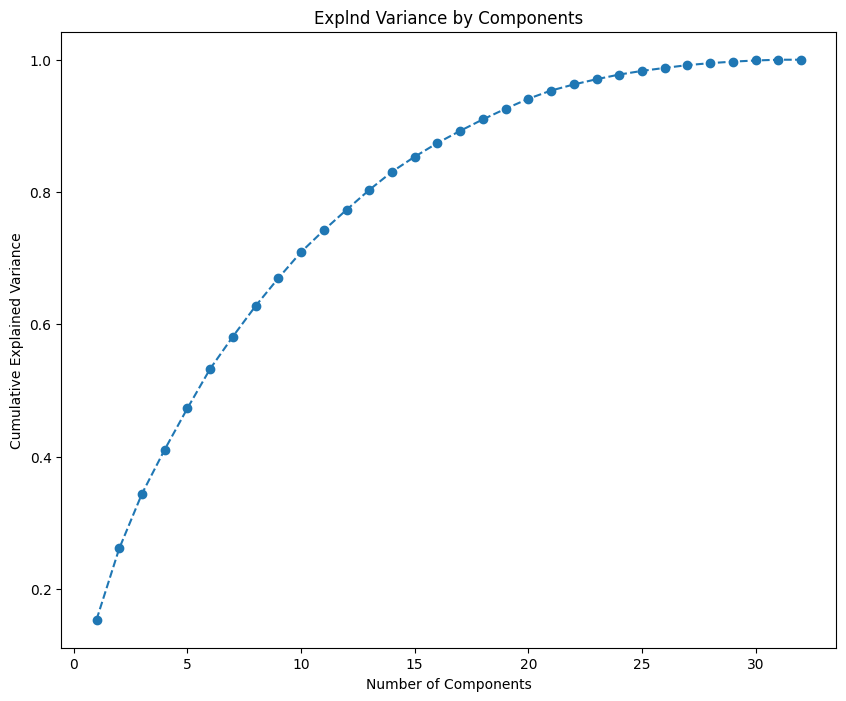

In [13]:
plt.figure(figsize = (10,8))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explnd Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [16]:
# using the derived number of components
pca = PCA(n_components = number_of_components)
# pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=21)

In [17]:
scores_pca = pca.transform(scaled_data)

In [18]:
scores_pca.shape

(32, 21)

In [19]:
x_pca = pca.transform(scaled_data)

In [20]:
x_pca.shape

(32, 21)

Text(0, 0.5, 'Second principle component')

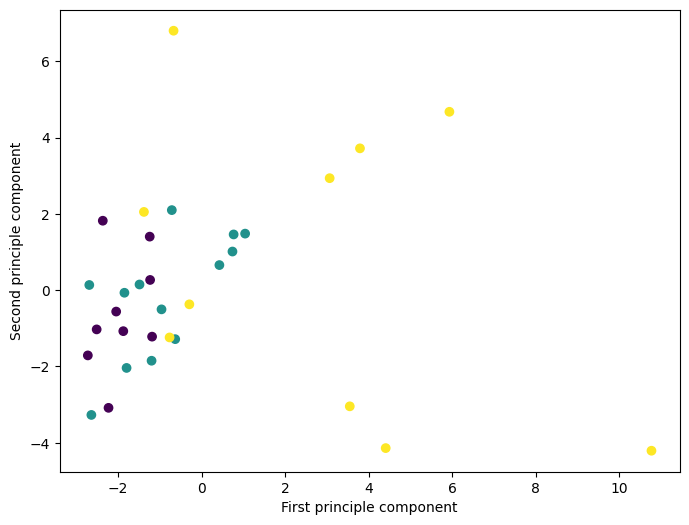

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=true_labels)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [22]:
# Helper function
def euclideanDistance(pt, data):
    '''
    Point has dimensions (m,), and data has dimensions (n, m)
    Function returns the Euclidean distance between data and point pt with the dimensions(n, ).
    '''
    return np.sqrt(np.sum((pt - data)**2, axis = 1))

In [23]:
pt = np.array([1,2])
pt.shape
data = np.array([(4,5), (1, 4), (1, 5)])
data.shape
euclideanDistance(pt, data)

array([4.24264069, 2.        , 3.        ])

#### K-Means Clustering Implementation

In [24]:
class KMeans:
    def __init__(self, num_clusters = 2, max_iters = 200):
        self.num_clusters = num_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        # Select random starting points from the uniform distribution over the domain of the dataset
        min_vals, max_vals = np.min(X, axis=0), np.max(X, axis=0)
        self.centroids = [np.random.uniform(min_vals, max_vals) for _ in range(self.num_clusters)]
        # Iterate until convergence or max_iters is reached
        iteration = 0
        old_centroids = None
        while np.not_equal(self.centroids, old_centroids).any() and iteration < self.max_iters:
            # Assign data to nearest centroid
            sorted_points = [[] for _ in range(self.num_clusters)]
            for x in X:
                dists = euclideanDistance(x, self.centroids)
                # Finding the nearest centroid
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Recalculating the mean centroids
            old_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                # assigning nan's with old centroid
                if np.isnan(centroid).any():  
                    self.centroids[i] = old_centroids[i]
            iteration += 1
    def getCluster(self, X):
        '''
        Returns the centroid and 
        corresponding centroid index 
        (can be interperated as class) 
        for each data points.
        '''
        centroids = []
        centroid_indexes = []
        for x in X:
            dists = euclideanDistance(x, self.centroids)
            centroid_index = np.argmin(dists)
            centroids.append(self.centroids[centroid_index])
            centroid_indexes.append(centroid_index)
        return centroids, centroid_indexes

In [25]:

n_clusters = 3
kmeans = KMeans(num_clusters=n_clusters)


In [26]:
kmeans.fit(x_pca)

In [27]:
class_centers, classification = kmeans.getCluster(x_pca)

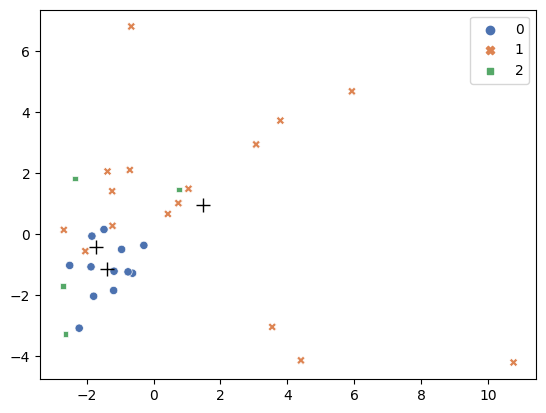

In [28]:
# plt.scatter(x_pca[:,0],x_pca[:,1],c=true_labels)
sns.scatterplot(x=x_pca[:,0],
                y=x_pca[:,1],
                hue=classification,
                style=classification,
                palette="deep",
                # legend=None
                )
centroids = np.array(kmeans.centroids)
plt.plot(centroids[:, 0],
         centroids[:, 1],
         'k+',
         markersize=10,
         )
plt.show()

In [29]:
x_pca[:,0]

array([-1.87511171, -2.22848513, -2.04534471, -1.23296165, -1.18584541,
       -1.24210286, -2.36582367, -2.72388399, -2.51247775, -0.71320965,
        0.76659748,  0.73868376, -0.63198024, -1.79639867,  1.04168029,
       -1.48660063, -0.95987066, -1.84789643,  0.42556237, -1.19802462,
       -2.63917289, -2.68894388, 10.7699397 ,  3.79135161,  3.06564654,
       -0.67147707, -1.38059891,  4.40737667,  3.54721733,  5.93231433,
       -0.2933163 , -0.76684324])

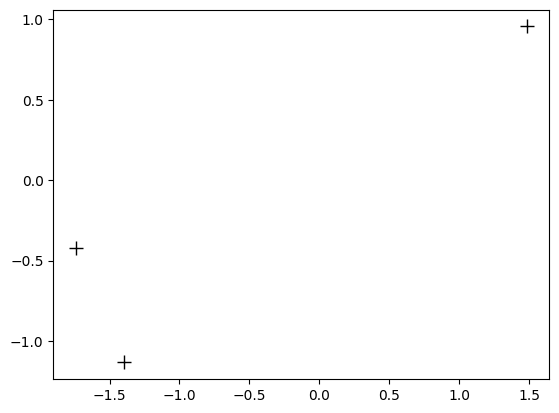

In [30]:
centroids = np.array(kmeans.centroids)
plt.plot(centroids[:, 0],
         centroids[:, 1],
         'k+',
         markersize=10,
         )
plt.show()

In [31]:

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

NameError: name 'u_labels' is not defined

In [79]:
# helper function to calculate the entropy
# Method to Calulate Total Entropy

# Input : Traning Data, label, classList

def calculateEntropy(trainData, label):
    classList = trainData[label].unique()
    totalCount = trainData.shape[0]

    totalEntropy = 0

    for c in classList:
        # Count the number of data points which satify == c class constraints
        totalClassCount = trainData[trainData[label] == c].shape[0]
        # Calulate the class's entropy
        classEntropy = 0
        prob = 0
        if(totalCount >0):
            prob = totalClassCount / totalCount
        if( prob >0):
            classEntropy = - (prob)*np.log2(prob)
        # Accumulate the class's entropy into the totalEntropy
        totalEntropy = totalEntropy + classEntropy
    
    return totalEntropy



def calculateEntropyGivenClusters(df_eval, classLabel, clusterLabel):
    # for each clusterLabel:
    #     calc P(cluster)
    #     calculate entropy of classLabel in df_eval[clusterLabel == cluster]

    totalEntropy = 0
    clusters = df_eval[clusterLabel].unique()
    totalCount = df_eval.shape[0]
    for cluster in clusters:
        df_cluster = df_eval[df_eval[clusterLabel] == cluster]
        clusterCount = df_cluster.shape[0]
        clusterProbability = 0
        if(totalCount > 0):
            clusterProbability = clusterCount / totalCount
        clusterEntropy = calculateEntropy(df_cluster, classLabel)
        totalEntropy += clusterProbability * clusterEntropy
    return totalEntropy
        


def calculateMutualInformation(df_eval, classLabel, clusterLabel, entropyClass):
    return entropyClass - calculateEntropyGivenClusters(df_eval, classLabel, clusterLabel)


In [83]:
def calculateNMI(df_eval, classLabel, clusterLabel):
    
    # entropy of Class
    entropyClass = calculateEntropy(df_eval, classLabel)

    # entropy of cluster
    entropyCluster = calculateEntropy(df_eval, clusterLabel)

    # Mutual Information b/w class and cluster
    I_yc = calculateMutualInformation(df_eval, classLabel, clusterLabel, entropyClass)

    # Calculating NMI
    nmi = (2*I_yc) / (entropyClass + entropyCluster)

    return nmi

In [86]:
# NMI Calculation

classLabel = "trueLabel"

clusterLabel = "clustered"

x_data = []
y_data = []
print(f"Started KMeans fitting")
for k in range(2, 9):
    kmeans = KMeans(num_clusters=k)
    kmeans.fit(x_pca)
    class_centers, classification = kmeans.getCluster(x_pca)
    
    data_dict = {
        # true labels
        classLabel : true_labels.iloc[:, 0],
        # kmean clusters
        clusterLabel : classification
    }
    df_eval = pd.DataFrame(data_dict)
    nmi = calculateNMI(df_eval, classLabel, clusterLabel)
    print(f"for k = {k}, NMI = {nmi}")
    x_data.append(k)
    y_data.append(nmi)
print(f"KMeans fitting finished for all k")

Started KMeans fitting
for k = 2, NMI = 0.17209149966203643
for k = 3, NMI = 0.2657728645804092
for k = 4, NMI = 0.20237453565447117
for k = 5, NMI = 0.21850270115599446
for k = 6, NMI = 0.15654889927071758
for k = 7, NMI = 0.21516310020631804
for k = 8, NMI = 0.14863022852685287
KMeans fitting finished for all k


Text(0, 0.5, 'NMI')

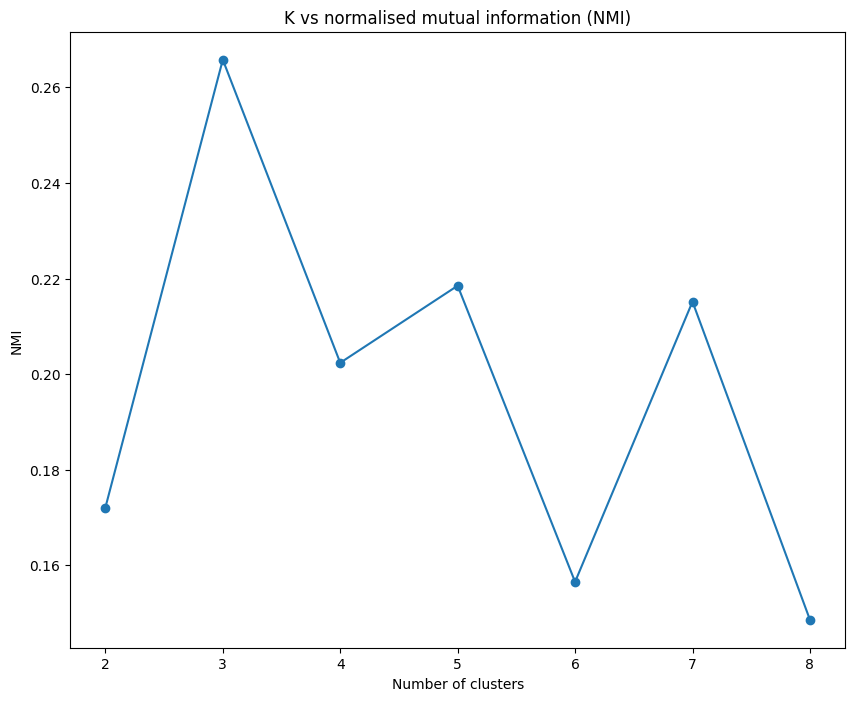

In [90]:
plt.figure(figsize = (10,8))
plt.plot(x_data, y_data, marker = 'o')
plt.title("K vs normalised mutual information (NMI)")
plt.xlabel("Number of clusters")
plt.ylabel("NMI")

In [97]:
print(f"k = {x_data[np.argmax(y_data)]} corresponds to max NMI = {np.max(y_data)}")

k = 3 corresponds to max NMI = 0.2657728645804092


In [87]:
try_df = pd.DataFrame(
    [
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 1],
        [1, 1],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 1],
        [2, 1],
        [2, 1],
        [2, 1],
        [2, 1],
        [2, 1],
        [2, 1],
        [3, 0],
        [3, 0],
        [3, 0],
        [3, 0],
        [3, 1]
    ]
    , columns = [classLabel, clusterLabel]
)

In [77]:
# try_df[try_df[classLabel] == 1].shape
# try_df.shape
# calculateEntropy(try_df, classLabel)
calculateNMI(try_df, classLabel, clusterLabel)

c = 1 p = 0.25
c = 2 p = 0.5
c = 3 p = 0.25
c = 0 p = 0.5
c = 1 p = 0.5
c = 1 p = 0.3
c = 2 p = 0.3
c = 3 p = 0.4
c = 1 p = 0.2
c = 2 p = 0.7
c = 3 p = 0.1
0.27226975609829207 1.5 1.0


0.10890790243931683